LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [74]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [75]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])
    
feat_info('mort_acc')

Number of mortgage accounts.


In [76]:
#load data
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [78]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [79]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [80]:
df['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

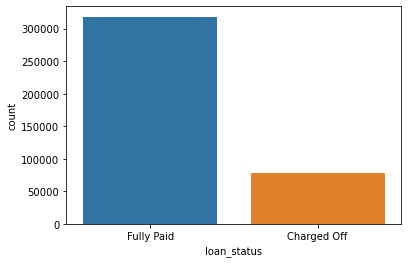

In [81]:
# seems to be pretty unbalanced dataset, as there are much more of those datapoints where loans were fully paid vs. Charged off
# this might mean that we'll get very high accuracy scores, but the models true performance will be measured via precision and recall metrics, and these metrics should be evaluated more carefully

sns.countplot(x='loan_status',data=df)

In [82]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10.0, 0.0)

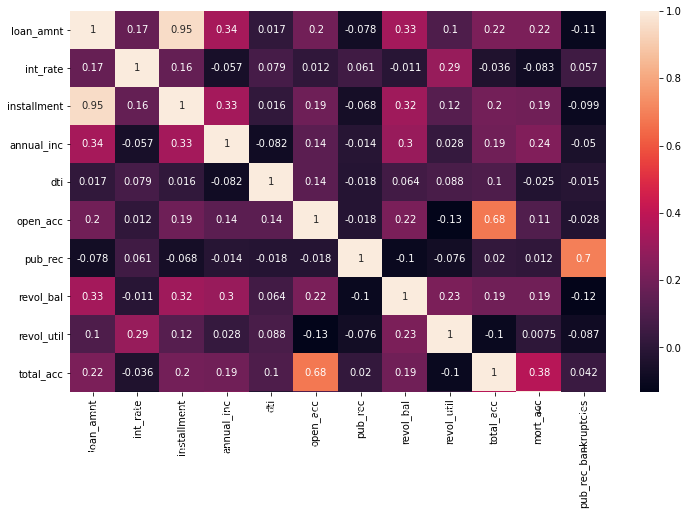

In [83]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)
plt.ylim(10, 0)

(0.0, 45000.0)

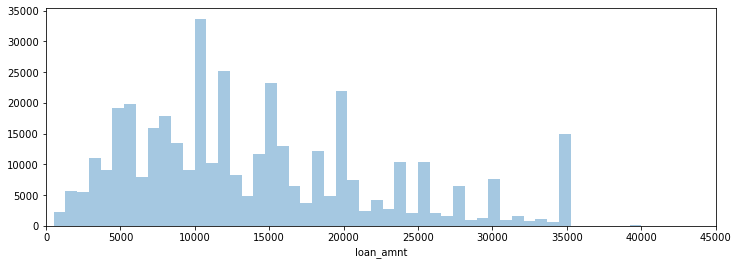

In [84]:
#certain data points seem to pop up from the histogram (probably due to the fact that loans are often given on certain rounded values e.g. 10 000, 15 000, 20 000 etc.)

plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=50)
plt.xlim(0,45000)

In [85]:
# very high correlation on loan_amt with installment -feature. Let's look more into that 

feat_info('installment')
print('\n')
feat_info('loan_amnt')

The monthly payment owed by the borrower if the loan originates.


The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


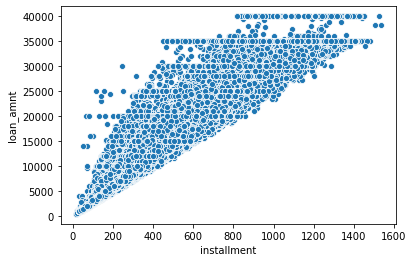

In [86]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

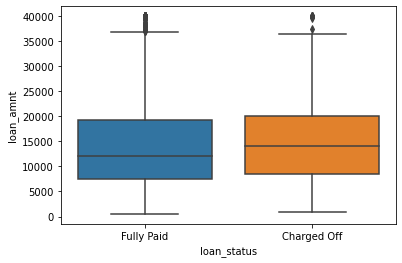

In [87]:
# Relationship between the loan_status and the Loan Amount using boxplot.

sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [88]:
# See detailed statistics for the loan amount, grouped by the loan_status.

df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [89]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [90]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

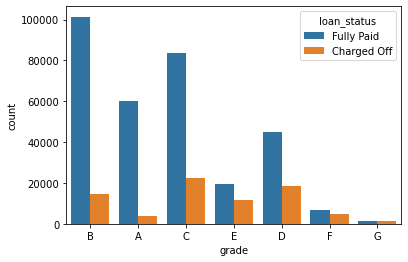

In [91]:
sns.countplot(x='grade',data=df,hue='loan_status')

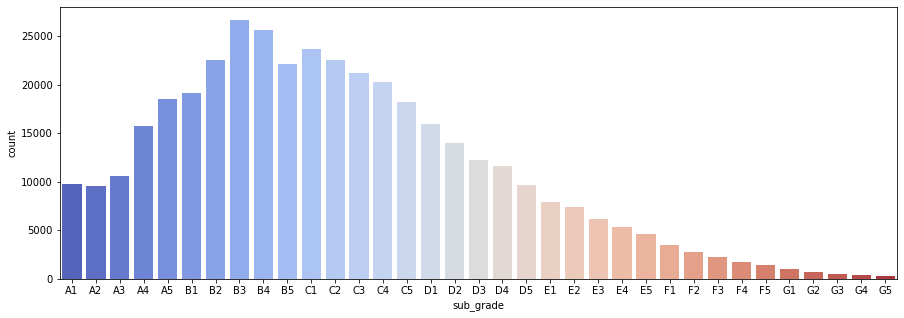

In [92]:
plt.figure(figsize=(15,5))
sns.countplot(x='sub_grade',data=df,order=sorted(df['sub_grade'].unique()),palette='coolwarm')

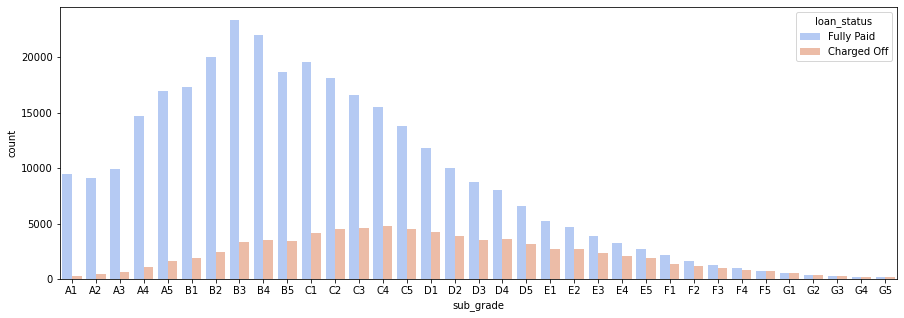

In [93]:
plt.figure(figsize=(15,5))
sns.countplot(x='sub_grade',data=df,order=sorted(df['sub_grade'].unique()),hue='loan_status',palette='coolwarm')

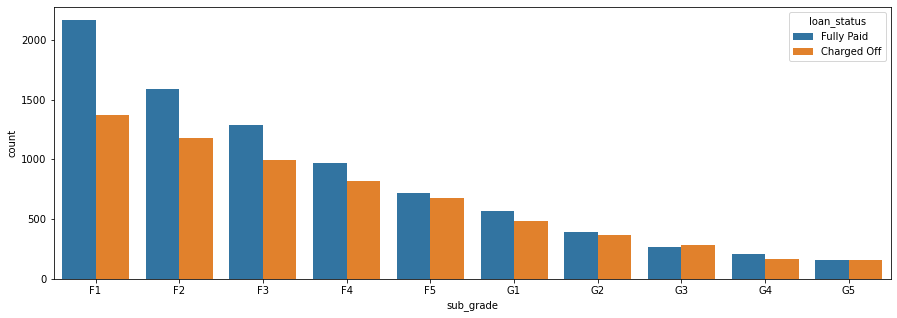

In [94]:
# F and G grade loans seem to default relatively more often, let's take a closer look there

plt.figure(figsize=(15,5))

f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]
sns.countplot(x='sub_grade',data=f_and_g,order = sorted(f_and_g['sub_grade'].unique()),hue='loan_status')

In [99]:
# let's create a new column named 'loan_repaid' which will show as 1 (=if loan status was 'Fully Paid') or 0 (=if loan status was 'Charged Off')

df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [100]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


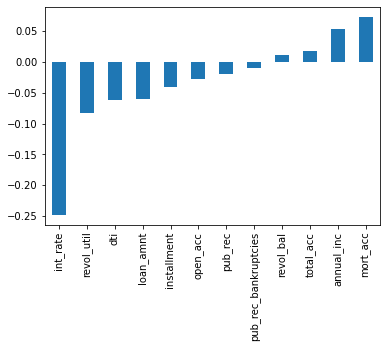

In [108]:
# let's see correlation of numerical features to the just created 'loan_repaid' column

df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [109]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [110]:
len(df)

396030

In [113]:
# let's see count of missing values per column

df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [115]:
# let's convert series to be in percentages of the total df

df.isnull().sum() / len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [117]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [118]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [120]:
feat_info('mort_acc')

Number of mortgage accounts.


In [121]:
df['emp_title'].nunique()

173105

In [123]:
df['emp_title'].value_counts()

Teacher                                     4389
Manager                                     4250
Registered Nurse                            1856
RN                                          1846
Supervisor                                  1830
                                            ... 
Sapphiers NY                                   1
Investigator/Police Officer                    1
Mountain View Los Altos High School Dist       1
Laboratory Asst. II                            1
Skyles Insurance Agency                        1
Name: emp_title, Length: 173105, dtype: int64

In [124]:
# let's remove 'emp_title' column from the df, as there are so many unique job titles so converting the to dummy variables isn't practical, and feature engineering those to larger groups would be a large time consuming task 

df = df.drop('emp_title',axis=1)

In [126]:
sorted(df['emp_length'].dropna().unique())


['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [130]:
emp_length_order = ['< 1 year','1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

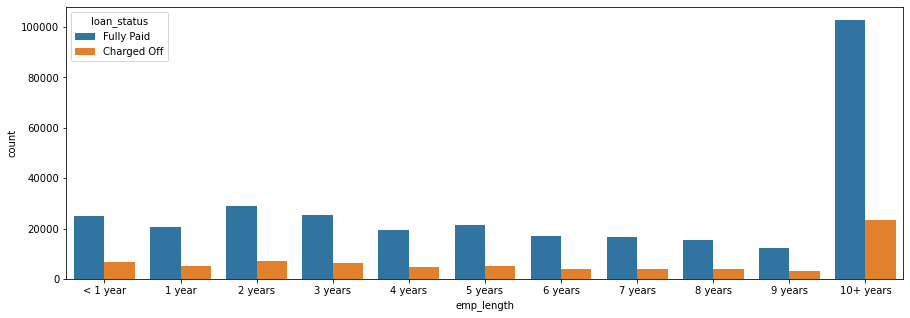

In [132]:
plt.figure(figsize=(15,5))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

In [137]:
# let's see the % of charge offs per empployment length, to see the usefulness of this feature

emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [138]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [141]:
# not really major differencies with different employment lengths compared to loan repayment 

emp_co / (emp_fp+emp_co)

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

In [142]:
df = df.drop('emp_length',axis=1)

In [147]:
df.isnull().sum() / len(df) *100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [148]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [149]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [154]:
# let's drop 'title' column as it is practically the same as 'purpose' columns

df = df.drop('title',axis=1)

In [155]:
feat_info('mort_acc')

Number of mortgage accounts.


In [152]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [158]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [161]:
## let's fill in the missing mort_acc values based on their total_acc value (there's relatively high correlation). If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series created here.

total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [162]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc): # if mort_acc is missing a value
        return total_acc_avg[total_acc] # look up total_acc_avg based on total_acc
    else:
        return mort_acc

In [164]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [166]:
# let's see that mort_acc columns has no null values

df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [167]:
# drop row including zero columnn values
df = df.dropna()

In [168]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

In [172]:
# lets take care of categorical variables next
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [173]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [174]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [175]:
# let's turn term column into numerical column by catching the month number form the value and turn it into integer

df['term'] = df['term'].apply(lambda term: int(term[:3]))

<ipython-input-175-a329df7367be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['term'] = df['term'].apply(lambda term: int(term[:3]))


In [177]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [178]:
# grade is part of sub_grade feature -> let's drop grade column, concat new columns to the df, drop original sub_grade column

df = df.drop('grade',axis=1)

In [179]:
# convert sub_grade into dummy variables

dummies = pd.get_dummies(df['sub_grade'],drop_first=True) # get k-1 dummies out of k categorical levels by removing the first level.
df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1) # drop original sub_grade column and concat new columns

In [181]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [182]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [183]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [184]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [185]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [187]:
# do the same dummy variable transformation for verification_status, application_type, initial_list_status and purpose
# convert sub_grade into dummy variables

dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)
df = pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [188]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

In [189]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [190]:
# concat NONE and ANY with OTHER

df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [191]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [192]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True) 
df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [193]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [196]:
# let's feature engineer zip code from the address

df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [197]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [198]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True) 
df = pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

In [199]:
# drop original address column

df = df.drop('address',axis=1)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   issue_d                              395219 non-null  object 
 6   loan_status                          395219 non-null  object 
 7   dti                                  395219 non-null  float64
 8   earliest_cr_line                     395219 non-null  object 
 9   open_acc                             395219 non-null  float64
 10  pub_rec                              395219 non-null  float64
 11  revol_bal    

In [201]:
feat_info('issue_d')

The month which the loan was funded


In [202]:
# issued_d not relevant information as we're trying to predict whether or not to give loan, so we wouldn't have information about the month in which loan was funded
# let's drop the column

df = df.drop('issue_d',axis=1)

In [203]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [205]:
df['earliest_cr_line'].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Oct-1950       1
Jun-1959       1
Nov-1950       1
Dec-1956       1
Aug-1959       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [212]:
# let's collect the year modify the variable to integer

df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda year:int(year[-4:]))
df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

In [213]:
df['earliest_cr_line'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1948        1
1944        1
Name: earliest_cr_line, Length: 65, dtype: int64

In [215]:
from sklearn.model_selection import train_test_split

In [216]:
# let's drop loan_status column as it's a duplicate of the loan_repaid column

df = df.drop('loan_status',axis=1)

In [217]:
X = df.drop('loan_repaid',axis=1)
y= df['loan_repaid']

In [218]:
# let's create a train test split for the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [219]:
# normalize data 
from sklearn.preprocessing import MinMaxScaler

In [220]:
scaler = MinMaxScaler()

In [221]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [224]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [225]:
X_train.shape

(316175, 78)

In [228]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2)) # try to help the model from overfitting

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [230]:
# add early stop to prevent model from overfitting
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=15)

In [231]:
model.fit(x=X_train,y=y_train,epochs=300,batch_size=256,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/300
1236/1236 [==============================] - 4s 3ms/step - loss: 0.3544 - val_loss: 0.2652
Epoch 2/300
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2676 - val_loss: 0.2632
Epoch 3/300
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2651 - val_loss: 0.2624
Epoch 4/300
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2619 - val_loss: 0.2622
Epoch 5/300
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2613 - val_loss: 0.2619
Epoch 6/300
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2613 - val_loss: 0.2621
Epoch 7/300
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2598 - val_loss: 0.2618
Epoch 8/300
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2612 - val_loss: 0.2620
Epoch 9/300
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2595 - val_loss: 0.2616
Epoch 10/300
1236/1236 [==============================] - 3s 2ms/step - l

In [232]:
from tensorflow.keras.models import load_model

In [233]:
model.save('loan_defaulting.h5')

In [234]:
losses = pd.DataFrame(model.history.history)

In [236]:
losses

,loss,val_loss
0,0.299133,0.265170
1,0.265900,0.263239
2,0.263050,0.262376
3,0.261753,0.262227
4,0.260967,0.261935
5,0.260247,0.262091
6,0.260222,0.261846
7,0.259751,0.262028
8,0.259344,0.261555
9,0.258880,0.261433


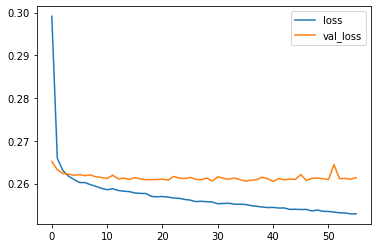

In [237]:
# loss = loss in training set
# val_loss = loss on test set

losses.plot()

In [238]:
from sklearn.metrics import classification_report,confusion_matrix

In [239]:
pred = model.predict_classes(X_test)

C:\Users\kajohann\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [240]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



[[ 6886  8772]
 [  139 63247]]


In [243]:
# let's see how model performs on a single person

import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 78, dtype: float64

In [246]:
#shape the data for the model
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [248]:
model.predict_classes(new_customer)

C:\Users\kajohann\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]])

In [249]:
# check whether customer actually ends up paying the loan

df.iloc[random_ind]['loan_repaid']

1.0